In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras import models,layers
from matplotlib import pyplot as plt

CODE FROM GOOGLE COLAB

In [ ]:
def conv_encode_decode(input_shape):
    '''
    '''
    #code based on that from project 1 extension
    #unit 1
    input_layer = tf.keras.Input(shape = input_shape)
    u1_conv = layers.Conv2D(16, (3,3), padding = 'same', activation = 'relu')(input_layer)
    u1_pool = layers.MaxPool2D(pool_size = (2,2))(u1_conv)
    #unit 2
    u2_conv = layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu')(u1_pool)
    u2_pool = layers.MaxPool2D(pool_size = (2,2))(u2_conv)

    #unit 3
    u3_conv = layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu')(u2_pool)
    u3_pool = layers.MaxPool2D(pool_size = (2,2))(u3_conv)

    #decode with convolution:

    u4_conv = layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu')(u3_pool)
    u4_convT = layers.UpSampling2D((2,2))(u4_conv)
    #unit 4
    u5_conv = layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu')(u4_convT)
    u5_convT = layers.UpSampling2D((2,2))(u5_conv)
    #unit 5
    u6_conv = layers.Conv2D(16, (3,3), padding = 'same', activation = 'relu')(u5_convT)
    u6_convT = layers.UpSampling2D((2,2))(u6_conv)

    u7_conv = layers.Conv2D(1, (3,3),padding = 'same', activation = 'relu')(u6_convT)

    model = models.Model(inputs = input_layer, outputs = u7_conv)

    return model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
keras.utils.plot_model(conv_encode_decode((128,128,1)), to_file="model.pdf", dpi = 300, show_shapes = True)

In [ ]:
all_x = np.load('/content/drive/MyDrive/all_supers_wave310.npy')
all_y = np.load('/content/drive/MyDrive/all_supers_true_wave310.npy')


In [ ]:
all_x = all_x[:3500]
all_y = all_y[:3500]

In [ ]:
# shuffle all_x and all_y in place
from sklearn.utils import shuffle
all_x, all_y = shuffle(all_x, all_y, random_state=0)

In [ ]:
num_samples = all_x.shape[0]
split= int(num_samples*0.8)
splash = int(num_samples*0.1)
X_train = all_x[:split]
y_train = all_y[:split]
X_val = all_x[split:(split+splash)]
y_val = all_y[split:(split+splash)]
X_test = all_x[split+splash:]
y_test = all_y[split+splash:]

In [ ]:
#convert to tensors
x_train_tensor = tf.convert_to_tensor(X_train)
y_train_tensor = tf.convert_to_tensor(y_train)
x_val_tensor = tf.convert_to_tensor(X_val)
y_val_tensor = tf.convert_to_tensor(y_val)

In [ ]:
#now we can load/train our model

model = conv_encode_decode((128,128,1))

In [ ]:
def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))

In [ ]:
#now we can compile our model
model.compile(optimizer='adam', loss=ssim_loss, metrics = ['mean_squared_error'])

In [ ]:
hist = model.fit(x_train_tensor,y_train_tensor, epochs = 125,batch_size = 32, validation_data=(x_val_tensor,y_val_tensor))

Epoch 1/125
88/88 [==============================] - 6s 31ms/step - loss: 0.6084 - mean_squared_error: 0.0167 - val_loss: 0.5662 - val_mean_squared_error: 0.0134
Epoch 2/125
88/88 [==============================] - 2s 22ms/step - loss: 0.5615 - mean_squared_error: 0.0134 - val_loss: 0.5508 - val_mean_squared_error: 0.0117
Epoch 3/125
88/88 [==============================] - 2s 22ms/step - loss: 0.5482 - mean_squared_error: 0.0125 - val_loss: 0.5449 - val_mean_squared_error: 0.0115
Epoch 4/125
88/88 [==============================] - 2s 23ms/step - loss: 0.5383 - mean_squared_error: 0.0118 - val_loss: 0.5322 - val_mean_squared_error: 0.0132
Epoch 5/125
88/88 [==============================] - 2s 23ms/step - loss: 0.5290 - mean_squared_error: 0.0117 - val_loss: 0.5215 - val_mean_squared_error: 0.0108
Epoch 6/125
88/88 [==============================] - 2s 23ms/step - loss: 0.5199 - mean_squared_error: 0.0113 - val_loss: 0.5172 - val_mean_squared_error: 0.0158
Epoch 7/125
88/88 [=========

In [ ]:
x_test_tensor = tf.convert_to_tensor(X_test)
y_test_tensor = tf.convert_to_tensor(y_test)

11/11 [==============================] - 0s 9ms/step
(350, 128, 128, 1)


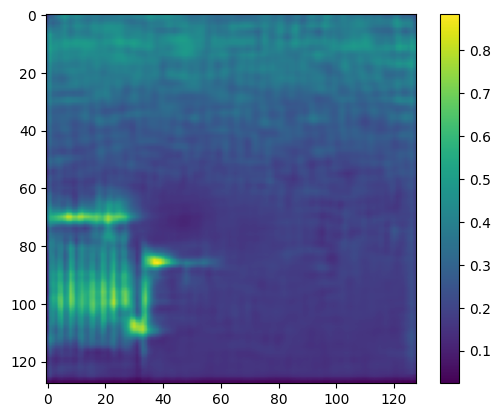

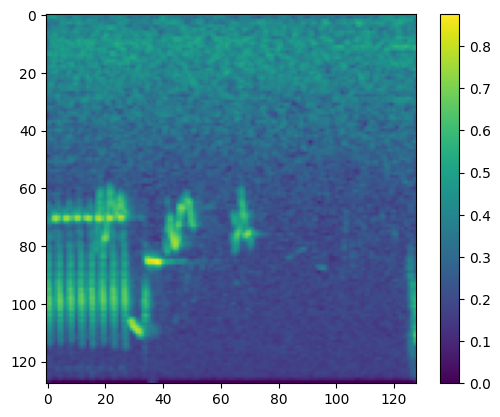

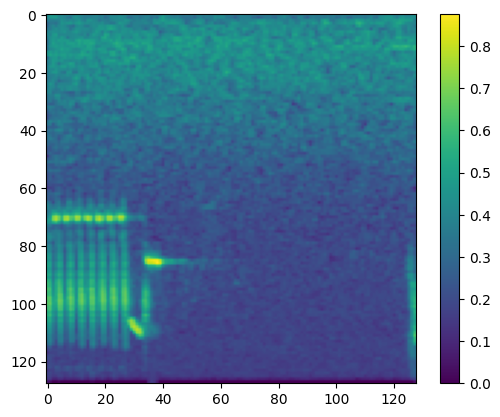

In [ ]:
preds = model.predict(x_test_tensor)
print(preds.shape)
plt.figure()
plt.imshow(preds[100])
plt.colorbar()
plt.figure()
plt.imshow(x_test_tensor[100])
plt.colorbar()
plt.figure()
plt.imshow(y_test_tensor[100])
plt.colorbar()

In [ ]:

test_loss, test_acc = model.evaluate(x_test_tensor, y_test_tensor,verbose=2)
print('\nTest loss:',test_loss)
print('\nTest accuracy:',test_acc)


11/11 - 0s - loss: 0.4300 - mean_squared_error: 0.0078 - 143ms/epoch - 13ms/step

Test loss: 0.4299618899822235

Test accuracy: 0.007768581155687571


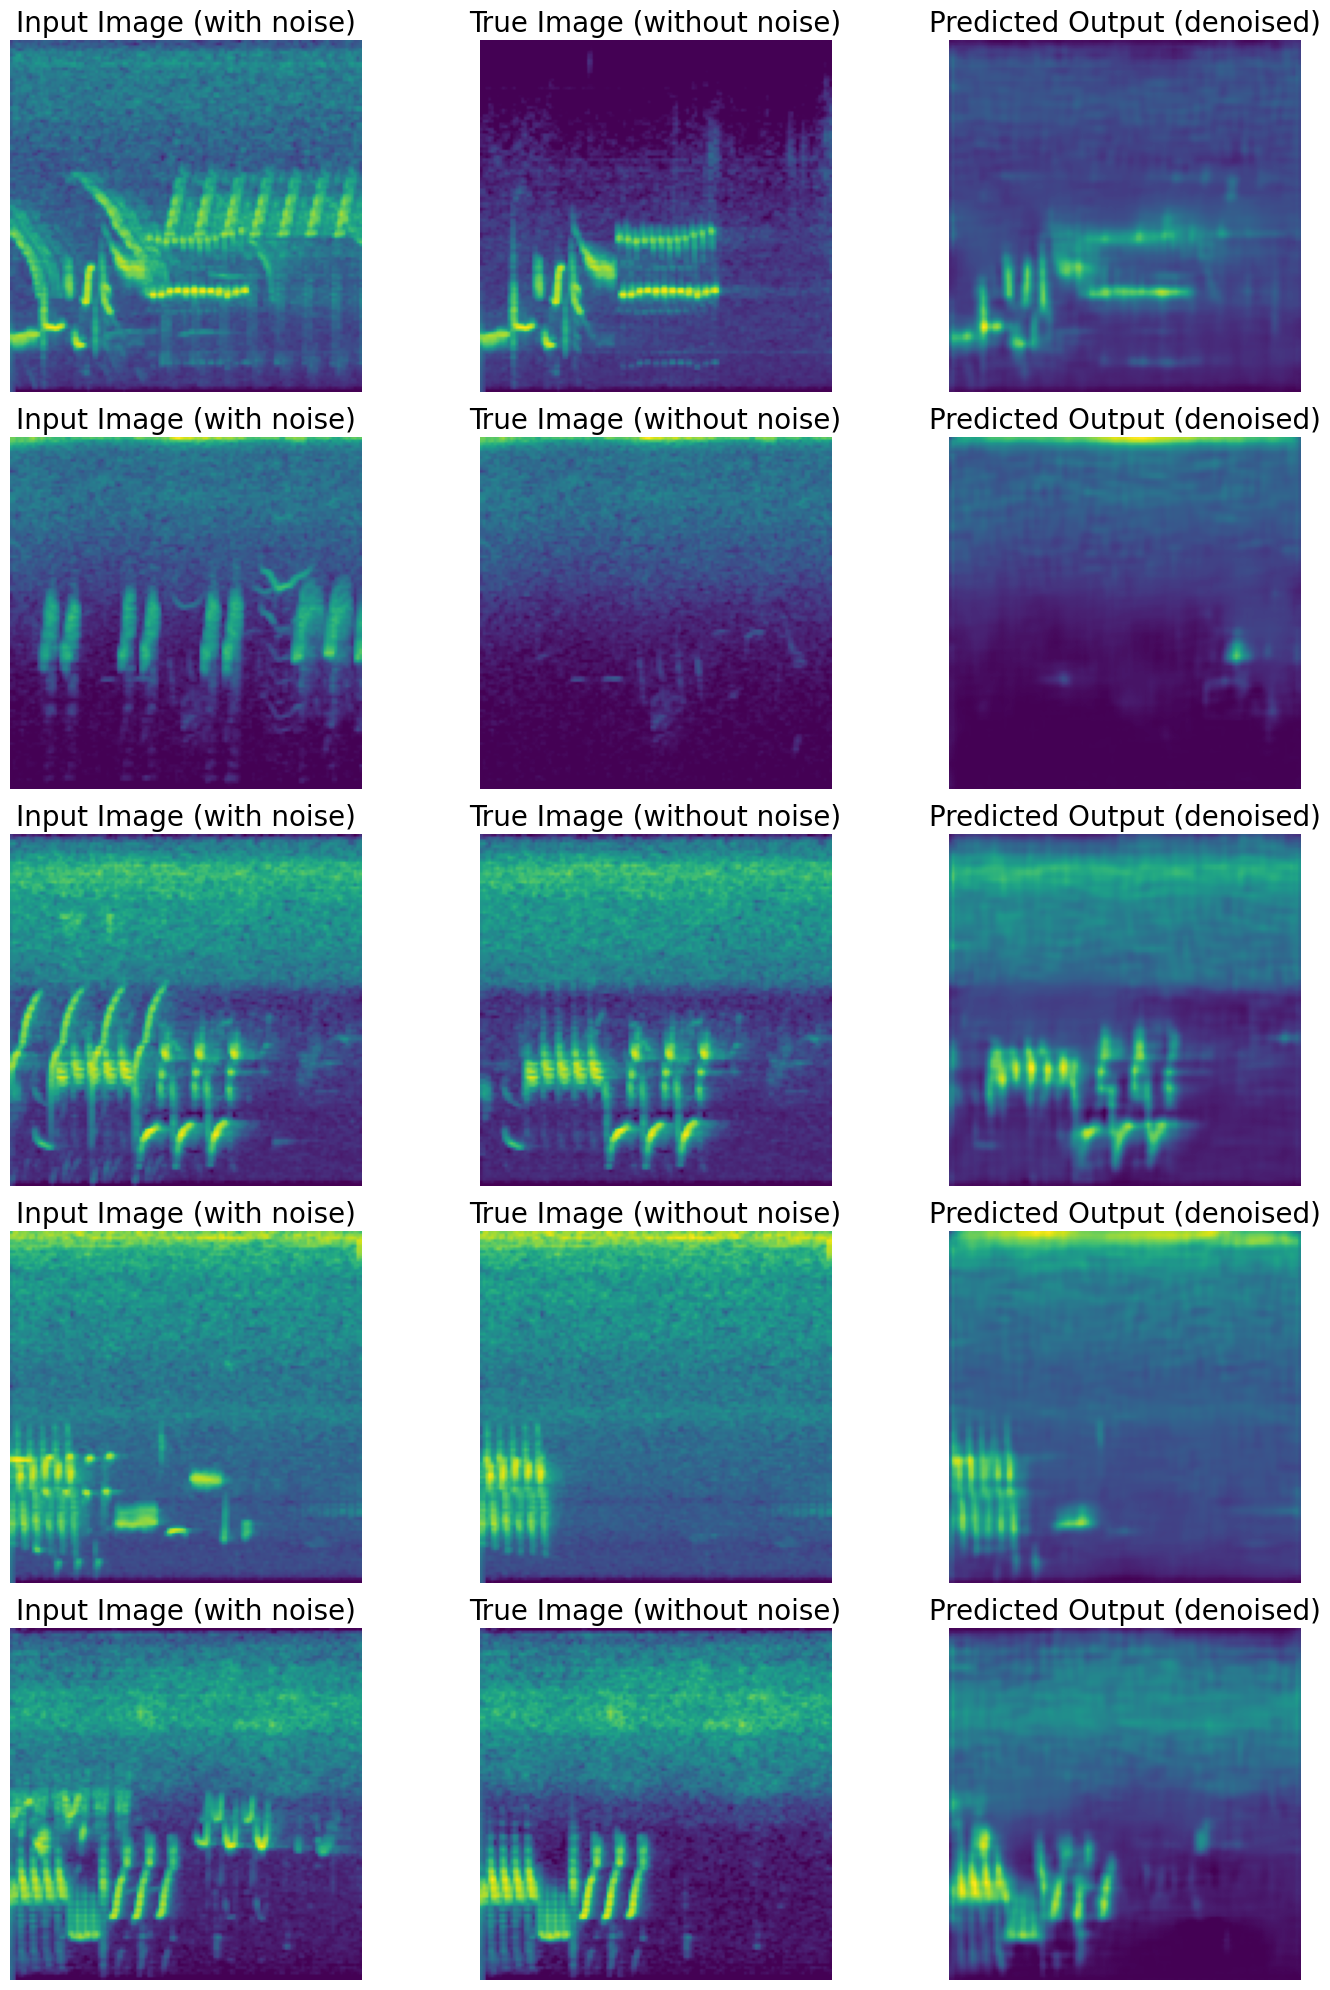

In [ ]:
#generate graph comparing some samples in preds:

#say we want to see 5 samples

# Select 5 random indices without replacement
indices = np.random.choice(x_test_tensor.shape[0], 5, replace=False)

# Create a figure
fig, axs = plt.subplots(5, 3, figsize=(15, 20))  # Changed to 3 columns

for i, idx in enumerate(indices):
    # show image
    axs[i, 0].imshow(x_test_tensor[idx], cmap='viridis')
    axs[i, 0].axis('off')
    axs[i, 0].set_title('Input Image (with noise)', fontsize = 20)  #title

    # show desired output
    axs[i, 1].imshow(y_test_tensor[idx], cmap='viridis')
    axs[i, 1].axis('off')
    axs[i, 1].set_title('True Image (without noise)', fontsize = 20)  #title

    # show output
    axs[i, 2].imshow(preds[idx], cmap='viridis') 
    axs[i, 2].axis('off') 
    axs[i, 2].set_title('Predicted Output (denoised)', fontsize = 20)  # title

plt.tight_layout()
plt.show()
fig.savefig('figure.svg')

In [ ]:
model.save('/content/drive/MyDrive/model_cardinalis_wave310.keras')

In [ ]:
np.save('/content/drive/MyDrive/preds_cardinalis_wave310.npy', preds)